# Exploratory Data Analysis 
## Weather Prediction for Hamburg
### Period 2005 - 2019

#### Dennis Aschenbrenner

In [214]:
# importing packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import norm
import statsmodels.formula.api as smf
from sklearn import preprocessing
sns.set()

In [215]:
# load data
df = pd.read_csv('weather_data.csv')
pd.set_option('display.max_columns', df.shape[1])
df.head()

,MESS_DATUM,ATMO_LBERG,FD_LBERG,FG_LBERG,SD_LBERG,ZENIT,R1,TT_TU,RF_TU,TD,V_N,V_S1_CS,V_S1_CSA,V_S1_HHS,V_S1_NS,V_S2_CS,V_S2_CSA,V_S2_HHS,V_S2_NS,V_S3_CS,V_S3_CSA,V_S3_HHS,V_S3_NS,V_S4_CS,V_S4_CSA,V_S4_HHS,V_S4_NS,P,SD_SO,FF,DD,V_TE002,V_TE005,V_TE010,V_TE020,V_TE050,V_TE100,V_VV
0,2005010100,120.0,0.0,0.0,0,148.86,0.0,4.7,95.0,4.0,7.0,7.0,ST-999,90.0,4.0,6.0,SC-999,540.0,7.0,-999.0,-999,-999.0,-999.0,-999.0,-999,-999.0,-999.0,1020.2,NaN,2.2,350,-999.0,5.6,5.5,5.2,4.6,5.2,2000.0
1,2005010101,100.0,0.0,0.0,0,144.98,0.1,4.3,95.0,3.6,7.0,7.0,ST-999,90.0,1.0,6.0,SC-999,1050.0,7.0,-999.0,-999,-999.0,-999.0,-999.0,-999,-999.0,-999.0,1020.5,NaN,1.5,310,-999.0,5.3,5.4,5.2,4.6,5.1,3500.0
2,2005010102,89.0,0.0,0.0,0,138.39,0.0,3.1,96.0,2.5,2.0,7.0,ST-999,30.0,2.0,-999.0,-999,-999.0,-999.0,-999.0,-999,-999.0,-999.0,-999.0,-999,-999.0,-999.0,1021.3,NaN,1.5,280,-999.0,4.7,5.1,5.1,4.6,5.1,800.0
3,2005010103,104.0,0.0,0.0,0,130.31,0.0,2.8,100.0,2.8,-1.0,-999.0,-999,-999.0,-999.0,-999.0,-999,-999.0,-999.0,-999.0,-999,-999.0,-999.0,-999.0,-999,-999.0,-999.0,1021.7,0.0,2.5,290,-999.0,4.1,4.8,5.1,4.7,5.2,300.0
4,2005010104,111.0,0.0,0.0,0,121.57,0.0,2.2,97.0,1.8,-1.0,-999.0,-999,-999.0,-999.0,-999.0,-999,-999.0,-999.0,-999.0,-999,-999.0,-999.0,-999.0,-999,-999.0,-999.0,1021.5,0.0,0.8,210,-999.0,3.8,4.5,4.9,4.7,5.2,300.0


In [216]:
# columns description

# MESS_DATUM         = Date with hours
# ATMO_LBERG         = Hourly sum of atmospheric back radiation in J/cm^2
# FD_LBERG           = Hourly sum of diffuse solar radiation in J/cm^2
# FG_LBERG           = Hourly sum of global radiation in J/cm^2
# SD_LBERG           = Hourly sum of sun duration in min
# ZENIT              = Zenith angle of sun in degrees
# R1                 = Precipitation in mm
# TT_TU              = Temperature in °C
# RF_TU              = Relative Humidity in %
# TD                 = Dew point in °C
# V_N                = total cloud cover in 1/8 (0/8 .....8/8) 
# V_S1_CS            = cloud type of 1. layer
# V_S1_CSA           = abbrev. of cloud type
# V_S1_HHS           = height of 1. layer
# V_S1_NS            = cloud cover of 1. layer 1/8
# V_S2_CS            = cloud type of 2. layer code 
# V_S2_CSA           = abbrev. cloud type 2.layer code 
# V_S2_HHS           = height of 2.layer meter
# V_S2_NS            = cloud cover of 2. layer 1/8
# V_S3_CS            = cloud type of 3. layer code 
# V_S3_CSA           = abbrev. cloud type 3.layer code 
# V_S3_HHS           = height of 3.layer meter
# V_S3_NS            = cloud cover of 3. layer 1/8
# V_S4_CS            = cloud type of 4. layer code 
# V_S4_CSA           = abbrev. cloud type 4.layer code 
# V_S4_HHS           = height of 4.layer meter
# V_S4_NS            = cloud cover of 4. layer 1/8

#  cloud type             abbreviation
# Cirrus                     0 CI
# Cirrocumulus               1 CC
# Cirrostratus               2 CS
# Altocumulus                3 AC
# Altostratus                4 AS
# Nimbostratus               5 NS
# Stratocumulus              6 SC
# Stratus                    7 ST
# Cumulus                    8 CU
# Cumulonimbus               9 CB
# Cloudless                 10

# P                  = Pressure at sea level in hPa
# SD_SO              = sun duration in min
# FF                 = Mean Windspeed in m/s
# DD                 = Wind direction in degrees
# V_TE002            = soil temperature in 2 cm depth
# V_TE005            = soil temperature in 5 cm depth
# V_TE010            = soil temperature in 10 cm depth
# V_TE020            = soil temperature in 20 cm depth
# V_TE050            = soil temperature in 50 cm depth
# V_TE100            = soil temperature in 100 cm depth
# V_VV               = visibility in m


In [217]:
# shape of dataframe
df.shape

(134834, 38)

In [218]:
# format information 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134834 entries, 0 to 134833
Data columns (total 38 columns):
MESS_DATUM    134834 non-null int64
ATMO_LBERG    134834 non-null float64
FD_LBERG      134834 non-null float64
FG_LBERG      134834 non-null float64
SD_LBERG      134834 non-null int64
ZENIT         134834 non-null float64
R1            134782 non-null float64
TT_TU         134834 non-null float64
RF_TU         134834 non-null float64
TD            134834 non-null float64
V_N           134814 non-null float64
V_S1_CS       134817 non-null float64
V_S1_CSA      134817 non-null object
V_S1_HHS      134817 non-null float64
V_S1_NS       134817 non-null float64
V_S2_CS       134817 non-null float64
V_S2_CSA      134817 non-null object
V_S2_HHS      134817 non-null float64
V_S2_NS       134817 non-null float64
V_S3_CS       134817 non-null float64
V_S3_CSA      134817 non-null object
V_S3_HHS      134817 non-null float64
V_S3_NS       134817 non-null float64
V_S4_CS       134817 n

## Dealing with NaNs

In [219]:
# set all given nan-values to np.nan (-999 and ST-999)

df1 = df.replace(-999, np.nan)
df1 = df1.replace(-999.0, np.nan)

In [220]:
df1.head()

,MESS_DATUM,ATMO_LBERG,FD_LBERG,FG_LBERG,SD_LBERG,ZENIT,R1,TT_TU,RF_TU,TD,V_N,V_S1_CS,V_S1_CSA,V_S1_HHS,V_S1_NS,V_S2_CS,V_S2_CSA,V_S2_HHS,V_S2_NS,V_S3_CS,V_S3_CSA,V_S3_HHS,V_S3_NS,V_S4_CS,V_S4_CSA,V_S4_HHS,V_S4_NS,P,SD_SO,FF,DD,V_TE002,V_TE005,V_TE010,V_TE020,V_TE050,V_TE100,V_VV
0,2005010100,120.0,0.0,0.0,0.0,148.86,0.0,4.7,95.0,4.0,7.0,7.0,ST-999,90.0,4.0,6.0,SC-999,540.0,7.0,NaN,-999,NaN,NaN,NaN,-999,NaN,NaN,1020.2,NaN,2.2,350.0,NaN,5.6,5.5,5.2,4.6,5.2,2000.0
1,2005010101,100.0,0.0,0.0,0.0,144.98,0.1,4.3,95.0,3.6,7.0,7.0,ST-999,90.0,1.0,6.0,SC-999,1050.0,7.0,NaN,-999,NaN,NaN,NaN,-999,NaN,NaN,1020.5,NaN,1.5,310.0,NaN,5.3,5.4,5.2,4.6,5.1,3500.0
2,2005010102,89.0,0.0,0.0,0.0,138.39,0.0,3.1,96.0,2.5,2.0,7.0,ST-999,30.0,2.0,NaN,-999,NaN,NaN,NaN,-999,NaN,NaN,NaN,-999,NaN,NaN,1021.3,NaN,1.5,280.0,NaN,4.7,5.1,5.1,4.6,5.1,800.0
3,2005010103,104.0,0.0,0.0,0.0,130.31,0.0,2.8,100.0,2.8,-1.0,NaN,-999,NaN,NaN,NaN,-999,NaN,NaN,NaN,-999,NaN,NaN,NaN,-999,NaN,NaN,1021.7,0.0,2.5,290.0,NaN,4.1,4.8,5.1,4.7,5.2,300.0
4,2005010104,111.0,0.0,0.0,0.0,121.57,0.0,2.2,97.0,1.8,-1.0,NaN,-999,NaN,NaN,NaN,-999,NaN,NaN,NaN,-999,NaN,NaN,NaN,-999,NaN,NaN,1021.5,0.0,0.8,210.0,NaN,3.8,4.5,4.9,4.7,5.2,300.0


In [221]:
df1 = df1.drop(columns=(['V_S1_CSA','V_S2_CSA','V_S3_CSA','V_S4_CSA']))
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134834 entries, 0 to 134833
Data columns (total 34 columns):
MESS_DATUM    134834 non-null int64
ATMO_LBERG    114453 non-null float64
FD_LBERG      131054 non-null float64
FG_LBERG      131821 non-null float64
SD_LBERG      131571 non-null float64
ZENIT         134834 non-null float64
R1            134645 non-null float64
TT_TU         134803 non-null float64
RF_TU         134802 non-null float64
TD            134802 non-null float64
V_N           134814 non-null float64
V_S1_CS       126393 non-null float64
V_S1_HHS      126404 non-null float64
V_S1_NS       126406 non-null float64
V_S2_CS       63678 non-null float64
V_S2_HHS      63671 non-null float64
V_S2_NS       63678 non-null float64
V_S3_CS       10389 non-null float64
V_S3_HHS      10389 non-null float64
V_S3_NS       10389 non-null float64
V_S4_CS       5318 non-null float64
V_S4_HHS      5318 non-null float64
V_S4_NS       5318 non-null float64
P             134800 non-null

In [222]:
df1.describe()

,MESS_DATUM,ATMO_LBERG,FD_LBERG,FG_LBERG,SD_LBERG,ZENIT,R1,TT_TU,RF_TU,TD,V_N,V_S1_CS,V_S1_HHS,V_S1_NS,V_S2_CS,V_S2_HHS,V_S2_NS,V_S3_CS,V_S3_HHS,V_S3_NS,V_S4_CS,V_S4_HHS,V_S4_NS,P,SD_SO,FF,DD,V_TE002,V_TE005,V_TE010,V_TE020,V_TE050,V_TE100,V_VV
count,1.348340e+05,114453.000000,131054.000000,131821.000000,131571.000000,134834.000000,134645.000000,134803.000000,134802.000000,134802.000000,134814.000000,126393.000000,126404.000000,126406.000000,63678.00000,63671.000000,63678.000000,10389.000000,10389.000000,10389.000000,5318.0,5318.000000,5318.000000,134800.000000,101271.000000,134801.000000,134801.000000,0.0,134270.000000,134275.000000,134276.000000,134283.000000,134215.000000,134825.000000
mean,2.012206e+09,115.822128,20.927122,40.876219,11.108238,89.381339,0.085394,10.146089,79.148707,6.272756,5.412109,5.922583,1722.793266,3.275169,4.51996,2734.712192,5.572898,3.797093,3423.647127,6.499759,9.0,736.556976,2.611320,1015.074496,15.077722,4.012440,198.384137,NaN,11.187912,11.136710,11.129013,11.042924,10.928599,23552.530836
std,4.351448e+06,16.006860,31.741158,68.751440,20.563169,29.092790,0.475533,7.417865,16.059102,6.129689,2.652277,2.426627,2337.938907,2.291429,2.55410,2815.684031,1.609375,2.303257,2630.891246,0.887667,0.0,390.971037,1.649548,9.681928,22.748627,2.165524,91.438684,NaN,8.182812,7.576599,6.952609,6.021389,4.952508,14064.433303
min,2.005010e+09,59.000000,0.000000,0.000000,0.000000,30.720000,0.000000,-17.600000,16.000000,-21.200000,-1.000000,-1.000000,0.000000,-1.000000,0.00000,60.000000,1.000000,0.000000,90.000000,3.000000,9.0,90.000000,1.000000,969.900000,0.000000,0.000000,0.000000,NaN,-9.800000,-8.100000,-4.700000,-0.100000,2.000000,0.000000
25%,2.008111e+09,106.000000,0.000000,0.000000,0.000000,68.010000,0.000000,4.800000,70.000000,2.000000,3.000000,6.000000,330.000000,1.000000,3.00000,600.000000,4.000000,3.000000,1140.000000,6.000000,9.0,480.000000,1.000000,1009.300000,0.000000,2.400000,120.000000,NaN,4.400000,4.700000,5.100000,5.700000,6.400000,10000.000000
50%,2.012091e+09,117.000000,1.000000,1.000000,0.000000,89.340000,0.000000,10.100000,84.000000,6.600000,7.000000,7.000000,780.000000,2.000000,6.00000,1500.000000,6.000000,4.000000,3000.000000,7.000000,9.0,660.000000,2.000000,1015.500000,0.000000,3.700000,220.000000,NaN,10.500000,10.700000,10.900000,11.000000,10.900000,25000.000000
75%,2.016072e+09,127.000000,33.000000,54.000000,10.000000,110.540000,0.000000,15.400000,92.000000,11.100000,8.000000,8.000000,1800.000000,5.000000,6.00000,3900.000000,7.000000,6.000000,4500.000000,7.000000,9.0,900.000000,3.000000,1021.300000,30.000000,5.400000,270.000000,NaN,17.000000,17.100000,17.000000,16.500000,15.700000,35000.000000
max,2.019103e+09,158.000000,260.000000,354.000000,60.000000,149.280000,38.700000,36.300000,100.000000,22.500000,8.000000,8.000000,16500.000000,8.000000,8.00000,18000.000000,8.000000,8.000000,12000.000000,8.000000,9.0,7500.000000,8.000000,1047.700000,60.000000,17.900000,360.000000,NaN,38.900000,34.600000,29.700000,24.700000,21.000000,80000.000000


In [223]:
nans = df1.isna().sum()

In [224]:
zeros = (df1==0).sum()
nanzero = pd.concat([nans,nans/(len(df1))*100, zeros, zeros/(len(df1))*100],axis =1)
nanzero = nanzero.rename(columns={0: 'NaNs', 1: 'NaNs_per', 2: 'Zeros', 3: 'Zeros_per'})
nanzero

,NaNs,NaNs_per,Zeros,Zeros_per
MESS_DATUM,0,0.000000,0,0.000000
ATMO_LBERG,20381,15.115624,0,0.000000
FD_LBERG,3780,2.803447,63162,46.844268
FG_LBERG,3013,2.234600,63463,47.067505
SD_LBERG,3263,2.420013,91411,67.795215
ZENIT,0,0.000000,0,0.000000
R1,189,0.140172,119267,88.454692
TT_TU,31,0.022991,333,0.246970
RF_TU,32,0.023733,0,0.000000
TD,32,0.023733,533,0.395301


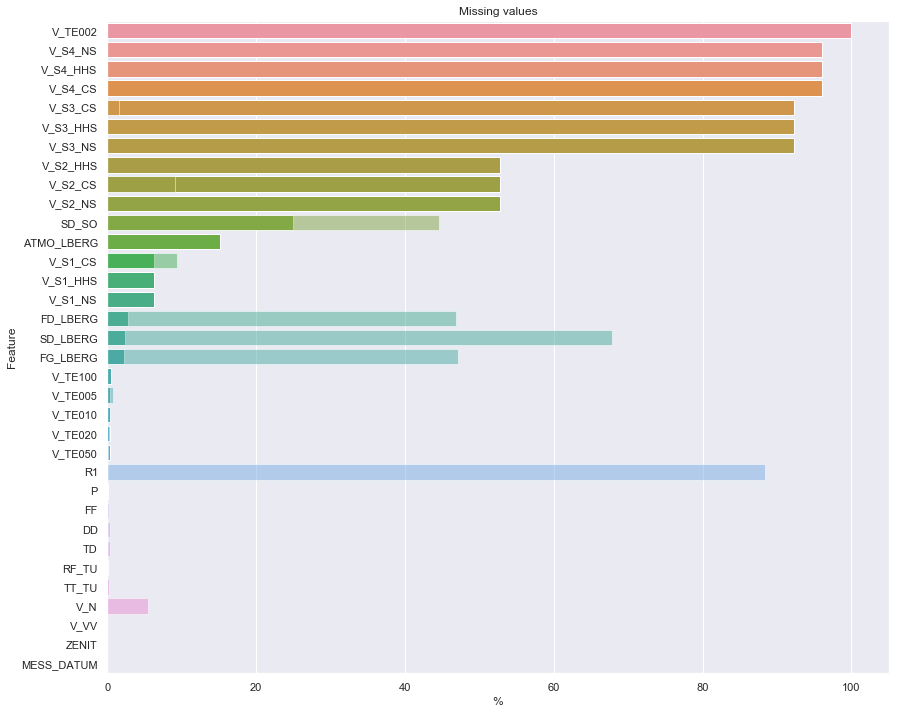

In [225]:
# Plot NaNs and Zeros in dataset


perc = pd.concat([(df1.isnull().sum()/len(df1)*100),((df1==0).sum()/len(df1)*100)],axis=1)
perc = perc.rename(columns={0: "NaN", 1: "Zero"})
perc = perc.sort_values(by=['NaN'],ascending=False)
plt.figure(figsize=(14,12))
ax = sns.barplot(y=perc.index[:37], x=perc.iloc[0:37,0],alpha=1)
ax = sns.barplot(y=perc.index[:37], x=perc.iloc[0:37,1],alpha=0.5)

plt.title('Missing values')
plt.ylabel('Feature')
plt.xlabel('%')
plt.show();

In [226]:
## Drop all columns with a high amount of NaNs
## that are cloud coverage and type of the 2. 3. and 4. layers and soil temperature in 2 cm depth

cols = nanzero[nanzero.NaNs_per > 50].index
df2 = df1.drop(columns=(cols))
df2.head()

,MESS_DATUM,ATMO_LBERG,FD_LBERG,FG_LBERG,SD_LBERG,ZENIT,R1,TT_TU,RF_TU,TD,V_N,V_S1_CS,V_S1_HHS,V_S1_NS,P,SD_SO,FF,DD,V_TE005,V_TE010,V_TE020,V_TE050,V_TE100,V_VV
0,2005010100,120.0,0.0,0.0,0.0,148.86,0.0,4.7,95.0,4.0,7.0,7.0,90.0,4.0,1020.2,NaN,2.2,350.0,5.6,5.5,5.2,4.6,5.2,2000.0
1,2005010101,100.0,0.0,0.0,0.0,144.98,0.1,4.3,95.0,3.6,7.0,7.0,90.0,1.0,1020.5,NaN,1.5,310.0,5.3,5.4,5.2,4.6,5.1,3500.0
2,2005010102,89.0,0.0,0.0,0.0,138.39,0.0,3.1,96.0,2.5,2.0,7.0,30.0,2.0,1021.3,NaN,1.5,280.0,4.7,5.1,5.1,4.6,5.1,800.0
3,2005010103,104.0,0.0,0.0,0.0,130.31,0.0,2.8,100.0,2.8,-1.0,NaN,NaN,NaN,1021.7,0.0,2.5,290.0,4.1,4.8,5.1,4.7,5.2,300.0
4,2005010104,111.0,0.0,0.0,0.0,121.57,0.0,2.2,97.0,1.8,-1.0,NaN,NaN,NaN,1021.5,0.0,0.8,210.0,3.8,4.5,4.9,4.7,5.2,300.0


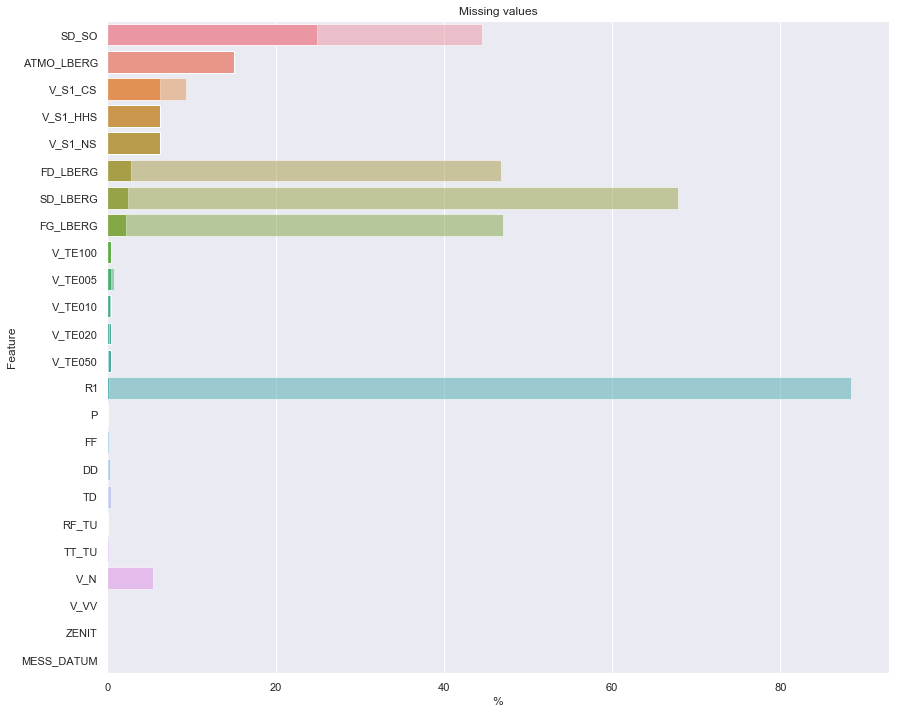

In [227]:
# Plot NaNs and Zeros after dropping columns with high amount of NaNs 

perc2 = pd.concat([(df2.isnull().sum()/len(df2)*100),((df2==0).sum()/len(df2)*100)],axis=1)
perc2 = perc2.rename(columns={0: "NaN", 1: "Zero"})
perc2 = perc2.sort_values(by=['NaN'],ascending=False)
plt.figure(figsize=(14,12))

ax1 = sns.barplot(y=perc2.index[:37], x=perc2.iloc[0:37,0],alpha=1)
ax2 = sns.barplot(y=perc2.index[:37], x=perc2.iloc[0:37,1],alpha=0.5)

plt.title('Missing values')
plt.ylabel('Feature')
plt.xlabel('%')

plt.show();

## Imputation

In [228]:
## Zeros are right. There is no need to handle them


## ATMO_LBERG = atmospheric back radiation exists continuous -> imputation with interpolation

## FD_LBERG = Hourly sum of diffuse solar radiation in J/cm^2: not continuous -> imputation due to interpolation

## FG_LBERG = Hourly sum of global radiation in J/cm^2: not continuous -> imputation due to interpolation

## SD_LBERG = Hourly sum of sun duration in min: not continuous -> imputation due to interpolation

## V_S1_CS = cloud type of 1. layer cannot be imputed -> set to '10' for cloudless

## V_S1_HHS = height of 1. layer, 0 = mist in 0m height and NaN = not measured or cloudless -> set to -1 if 
## total cloud cover V_N is zero otherwise interpolate 

## V_S1_NS  = cloud cover of 1. layer in 1/8 (0...8) -> impute with zero if total cloud cover V_N is zero!

## R1 = precipitation sum: not continuous -> set to zero if NaN

## V_TE010, V_TE020, V_TE050, V_TE100 are soil temps in given depth: continuous -> impute with interpolation

## P, FF, DD, TD, RF_TU, TT_TU are all conituous -> impute with interpolation

## total cloud coverage V_N set to coverage of the 1. cloud layer, ozherwise interpolation

## visibility V_VV -> interpolation 

## SD_SO is also sun duration and will be dropped 

In [229]:
## Imputation due to interpolation, zero and '10' replacements

df2 = df2.drop(columns='SD_SO')  # dropping the sun duration column 

for i in range(df2.shape[0]):             # replace nans of total cloud cov with values of cov of the 
    if np.isnan(df2.V_N.iloc[i]):         # 1. cloud layer
        df2.V_N[i] = df2.V_S1_NS[i]
        
liste=['ATMO_LBERG','FD_LBERG','FG_LBERG','SD_LBERG','V_TE005','V_TE010', 'V_TE020', 'V_TE050', 'V_TE100',
      'P', 'FF', 'DD', 'TD', 'RF_TU', 'TT_TU','V_VV','V_N']

for i in liste:                       # interpolation
    df2[i].interpolate(inplace=True)
    
df2['R1'].replace(np.nan,0,inplace=True)  # replace nans of precipitation to zero

## dropping cloud coverage of the 1. layer: assumption the total cloud coverage = coverage of the 1. layer
df2 = df2.drop(columns='V_S1_NS')

df2.V_S1_CS.replace(-1,1,inplace=True)    # replace cloid type -1 with 1

//anaconda3/envs/nf/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [230]:
mask = (df2['V_N'] == 0) & (df2['V_S1_CS'].isna())       # if cloud coverage is zero replace cloud type with 10
df2['V_S1_CS'][mask] = 10

mask1 = (df2['V_S1_HHS'] == 0) & (df2['V_S1_CS'].isna())  # set cloud type to 7 if cloud height = 0m
df2['V_S1_CS'][mask1] = 7

mask2 = ((df2['V_S1_HHS'] == 0) & (df2['V_N'] == -1))     # set cloud coverage to 8 if cloud height = 0m
df2['V_N'][mask2] = 8

index = df2[df2['V_N'] == -1].index.tolist()             # drop rows where there is no information about cloud
df2 = df2.drop(index)                                    # type, height and coverage

//anaconda3/envs/nf/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
//anaconda3/envs/nf/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
//anaconda3/envs/nf/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [231]:
df2.V_N = df2.V_N.round()

groups = df2.groupby(['V_N']).mean()
groups

,MESS_DATUM,ATMO_LBERG,FD_LBERG,FG_LBERG,SD_LBERG,ZENIT,R1,TT_TU,RF_TU,TD,V_S1_CS,V_S1_HHS,P,FF,DD,V_TE005,V_TE010,V_TE020,V_TE050,V_TE100,V_VV
V_N,,,,,,,,,,,,,,,,,,,,,
0.0,2.011753e+09,97.604313,6.377827,29.706382,12.652003,103.976705,0.000000,7.709296,77.191743,3.361173,9.997556,3240.000000,1021.446169,2.875729,154.462067,9.717503,10.370580,10.931247,10.797202,10.363713,27786.890699
1.0,2.012331e+09,103.547267,13.262932,61.886016,26.044308,87.627157,0.000284,11.504354,72.001138,5.864044,3.702524,4229.614664,1019.248275,3.260900,180.530712,13.525245,13.490123,13.399256,12.847464,12.100224,32408.137986
2.0,2.012201e+09,105.862314,16.721433,62.414666,24.269442,87.351437,0.002278,11.923338,73.013094,6.602029,4.525311,3426.416266,1017.653367,3.513338,191.094635,13.717117,13.593248,13.434416,12.938042,12.323055,30894.393572
3.0,2.012239e+09,107.748840,23.776541,71.026270,23.867001,84.067249,0.009558,12.283442,71.989480,6.757483,5.266951,2772.736954,1016.722610,3.788738,201.327952,14.137763,13.777843,13.423984,12.933404,12.400070,31033.477095
4.0,2.012116e+09,110.238497,30.096941,73.857789,22.686146,81.261596,0.014654,12.497465,71.902734,7.013244,5.703720,2334.714533,1015.852079,4.011421,208.303902,14.253210,13.772627,13.351131,12.907508,12.432574,30357.099117
5.0,2.012265e+09,111.636713,32.047203,67.075899,19.327438,81.979182,0.027549,12.310837,72.895416,7.082637,5.585063,2380.318540,1015.374784,4.029681,207.930830,13.819045,13.439031,13.120390,12.751972,12.318554,29668.564491
6.0,2.012070e+09,114.020576,34.795654,59.768870,15.444001,81.563447,0.036985,12.136922,74.419976,7.306840,5.954066,1951.744154,1014.488329,4.192464,210.351036,13.420403,13.087317,12.807324,12.497103,12.136102,28287.594318
7.0,2.012279e+09,118.473569,26.916155,33.276310,4.470367,87.109521,0.068069,10.524238,79.554583,6.889408,6.407944,1207.880322,1013.614355,4.211212,208.131794,11.197088,11.140396,11.141512,11.128815,11.083737,23814.144410
8.0,2.012220e+09,120.592127,9.656330,9.990319,0.099582,96.863374,0.232977,7.290589,88.954509,5.509321,6.738225,437.936124,1012.788634,4.426462,196.253411,7.473060,7.610450,7.855266,8.248995,8.776370,11746.686202


In [232]:

df2.V_S1_CS.isna().sum()

675

In [233]:
for i in np.arange(0,9,1):                   # replace NaNs for cloud type with mean cloud type of every coverage
    mask = (df2['V_N'] == i) & (df2['V_S1_CS'].isna())       
    df2['V_S1_CS'][mask] = groups.V_S1_CS[i].round()

//anaconda3/envs/nf/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [234]:
df2.V_S1_CS.isna().sum()

0

In [235]:
groups_CS = df2.groupby(['V_S1_CS']).mean()

In [236]:
groups_CS

,MESS_DATUM,ATMO_LBERG,FD_LBERG,FG_LBERG,SD_LBERG,ZENIT,R1,TT_TU,RF_TU,TD,V_N,V_S1_HHS,P,FF,DD,V_TE005,V_TE010,V_TE020,V_TE050,V_TE100,V_VV
V_S1_CS,,,,,,,,,,,,,,,,,,,,,
0.0,2.012131e+09,104.599809,12.668466,48.379501,21.158214,91.688044,0.001530,11.368278,72.826187,5.984037,2.888995,8012.492864,1019.671219,3.094467,161.714340,12.866196,13.043929,13.120845,12.534211,11.753839,29858.729781
1.0,2.015271e+09,106.714286,26.142857,132.571429,54.785714,68.053571,0.000000,13.464286,57.285714,4.564286,2.071429,7500.000000,1026.742857,3.121429,197.142857,13.342857,12.150000,11.557143,11.592857,11.271429,33571.428571
2.0,2.013738e+09,105.265941,12.203320,16.278008,6.145228,106.497095,0.000000,8.428216,77.975104,4.475934,6.929461,7555.643154,1015.286307,3.382158,171.742739,8.987967,9.586307,10.092946,10.219087,10.392946,25165.560166
3.0,2.012675e+09,112.945494,16.310228,34.356943,12.781437,92.367611,0.011031,12.327873,75.913904,7.776159,4.798826,3448.118870,1015.112700,3.298602,168.185352,13.219269,13.509827,13.732960,13.319296,12.585585,28089.983236
4.0,2.012617e+09,110.857637,9.118451,15.706150,4.744875,102.449522,0.167882,8.733713,77.974943,4.847608,6.498861,3870.618557,1012.356720,4.007062,171.526196,9.363326,9.752620,10.011845,9.965604,10.028474,24915.489749
5.0,2.013566e+09,113.534304,16.400000,45.850000,16.477333,88.361947,0.233333,11.518933,77.013333,7.225600,4.338667,847.954545,1010.735200,4.590133,216.613333,13.217733,13.081200,12.680533,11.980267,11.599867,29456.186667
6.0,2.012228e+09,113.850160,12.094834,17.129946,4.105717,98.905185,0.049569,8.700177,80.985821,5.444851,6.028459,1067.919288,1014.640030,3.991458,199.241930,9.225053,9.592388,9.972799,10.160540,10.280544,24331.628568
7.0,2.011947e+09,118.423146,9.424180,10.420065,0.959321,98.614365,0.230945,6.453718,92.989527,5.391254,7.546603,176.880796,1013.352459,4.060207,203.085369,6.739308,6.936010,7.301075,7.868650,8.522353,8316.359245
8.0,2.012323e+09,117.168953,44.151689,87.046946,20.786762,68.003229,0.070743,13.903035,69.754227,7.989886,5.318431,809.575605,1014.029753,4.784807,225.312677,15.726786,14.735515,13.834439,13.243414,12.771663,30703.313625


In [237]:
for i in (0,1,2,3,4,5,6,7,8,10):        # replace NaNs for cloud height with mean cloud type of every coverage
    mask = (df2['V_S1_CS'] == i) & (df2['V_S1_HHS'].isna())       
    df2['V_S1_HHS'][mask] = groups_CS.V_S1_HHS[i]

//anaconda3/envs/nf/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [238]:
## BAD ASSUMPTION, because height 0 means there is mist

mask3 = ((df2['V_S1_CS'] == 10) & df2['V_S1_HHS'].isna())     # set cloud height to 0 if cloud type = 10
df2.V_S1_HHS[mask3] = 0  

## otherwise the column cloud height has to be dropped from dataset!

//anaconda3/envs/nf/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [239]:
df2.isna().sum()

MESS_DATUM    0
ATMO_LBERG    0
FD_LBERG      0
FG_LBERG      0
SD_LBERG      0
ZENIT         0
R1            0
TT_TU         0
RF_TU         0
TD            0
V_N           0
V_S1_CS       0
V_S1_HHS      0
P             0
FF            0
DD            0
V_TE005       0
V_TE010       0
V_TE020       0
V_TE050       0
V_TE100       0
V_VV          0
dtype: int64

In [240]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 134437 entries, 0 to 134833
Data columns (total 22 columns):
MESS_DATUM    134437 non-null int64
ATMO_LBERG    134437 non-null float64
FD_LBERG      134437 non-null float64
FG_LBERG      134437 non-null float64
SD_LBERG      134437 non-null float64
ZENIT         134437 non-null float64
R1            134437 non-null float64
TT_TU         134437 non-null float64
RF_TU         134437 non-null float64
TD            134437 non-null float64
V_N           134437 non-null float64
V_S1_CS       134437 non-null float64
V_S1_HHS      134437 non-null float64
P             134437 non-null float64
FF            134437 non-null float64
DD            134437 non-null float64
V_TE005       134437 non-null float64
V_TE010       134437 non-null float64
V_TE020       134437 non-null float64
V_TE050       134437 non-null float64
V_TE100       134437 non-null float64
V_VV          134437 non-null float64
dtypes: float64(21), int64(1)
memory usage: 23.6 MB


In [242]:
## Convert date column to datetime format

df2['MESS_DATUM'] = df2.MESS_DATUM.astype(str)
df2.reset_index(inplace=True,drop=True)
df2.MESS_DATUM = pd.to_datetime(df2.MESS_DATUM, format='%Y%M%d%H', errors='ignore')
df2.head()

,MESS_DATUM,ATMO_LBERG,FD_LBERG,FG_LBERG,SD_LBERG,ZENIT,R1,TT_TU,RF_TU,TD,V_N,V_S1_CS,V_S1_HHS,P,FF,DD,V_TE005,V_TE010,V_TE020,V_TE050,V_TE100,V_VV
0,2005-01-01 00:01:00,120.0,0.0,0.0,0.0,148.86,0.0,4.7,95.0,4.0,7.0,7.0,90.0,1020.2,2.2,350.0,5.6,5.5,5.2,4.6,5.2,2000.0
1,2005-01-01 01:01:00,100.0,0.0,0.0,0.0,144.98,0.1,4.3,95.0,3.6,7.0,7.0,90.0,1020.5,1.5,310.0,5.3,5.4,5.2,4.6,5.1,3500.0
2,2005-01-01 02:01:00,89.0,0.0,0.0,0.0,138.39,0.0,3.1,96.0,2.5,2.0,7.0,30.0,1021.3,1.5,280.0,4.7,5.1,5.1,4.6,5.1,800.0
3,2005-01-01 06:01:00,113.0,0.0,0.0,0.0,104.08,0.0,2.0,98.0,1.7,8.0,7.0,60.0,1022.0,2.3,220.0,3.7,4.2,4.7,4.8,5.2,3500.0
4,2005-01-01 07:01:00,114.0,0.0,0.0,0.0,96.06,0.0,2.7,100.0,2.7,7.0,7.0,60.0,1021.8,2.8,210.0,3.6,4.0,4.5,4.7,5.2,4500.0


## Data Exploration


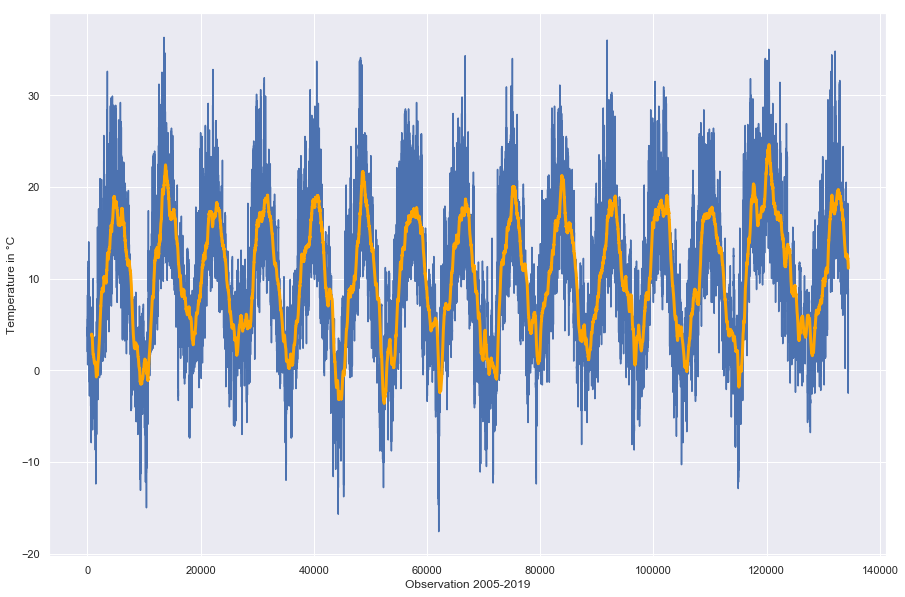

In [246]:
plt.figure(figsize=(15,10))

rolling_mean = df2.TT_TU.rolling(window=730).mean()   # 730 = monthly moving average
#df2 = df2.set_index('MESS_DATUM')
plt.xlabel('Observation 2005-2019')
plt.ylabel('Temperature in °C');
plt.plot(df2.TT_TU)

plt.plot(rolling_mean, label='Monthly rolling mean of temperature 2005-2019', color='orange', linewidth=3)

plt.show()

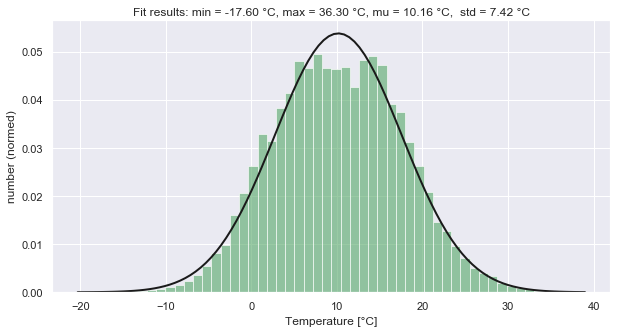

In [247]:
plt.figure(figsize=(10,5))
plt.hist(df2.TT_TU, bins=50, alpha=0.6, density=True, color='g');

mu = norm.fit(df2.TT_TU)
μ = mu[0]
σ = mu[1]
minimum = df2.TT_TU.min()
maximum = df2.TT_TU.max()
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, μ, σ)
plt.plot(x, p, 'k', linewidth=2);
title = "Fit results: min = {:.2f} °C, max = {:.2f} °C, mu = {:.2f} °C,  std = {:.2f} °C".format(minimum,maximum,μ, σ)
plt.title(title)
plt.xlabel('Temperature [°C]')
plt.ylabel('number (normed)')
plt.ticklabel_format(style='plain', axis='y', scilimits=(0,0))
plt.ticklabel_format(style='plain', axis='x', scilimits=(0,0))
#plt.savefig('Distprice.png', dpi=500);

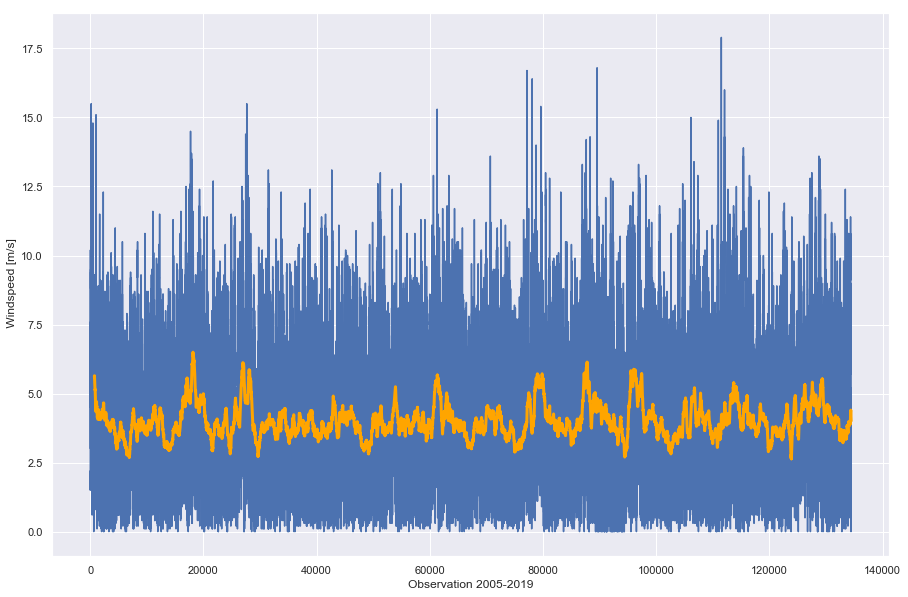

In [251]:
plt.figure(figsize=(15,10))

rolling_mean = df2.FF.rolling(window=730).mean()    
#df2 = df2.set_index('MESS_DATUM')
plt.xlabel('Observation 2005-2019')
plt.ylabel(' Windspeed [m/s]');
plt.plot(df2.FF)

plt.plot(rolling_mean, label='Monthly rolling mean of temperature 2005-2019', color='orange', linewidth=3)

plt.show()

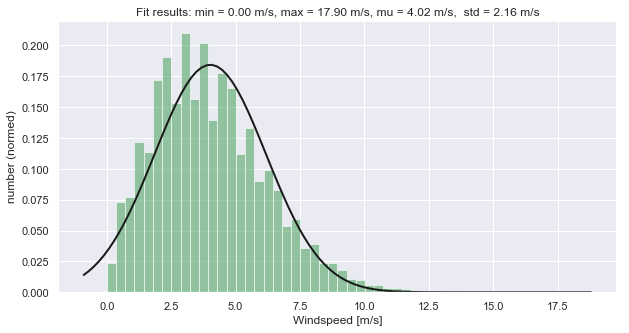

In [252]:
plt.figure(figsize=(10,5))
plt.hist(df2.FF, bins=50, alpha=0.6, density=True, color='g');

mu = norm.fit(df2.FF)
μ = mu[0]
σ = mu[1]
minimum = df2.FF.min()
maximum = df2.FF.max()
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, μ, σ)
plt.plot(x, p, 'k', linewidth=2);
title = "Fit results: min = {:.2f} m/s, max = {:.2f} m/s, mu = {:.2f} m/s,  std = {:.2f} m/s".format(minimum,maximum,μ, σ)
plt.title(title)
plt.xlabel('Windspeed [m/s]')
plt.ylabel('number (normed)')
plt.ticklabel_format(style='plain', axis='y', scilimits=(0,0))
plt.ticklabel_format(style='plain', axis='x', scilimits=(0,0))

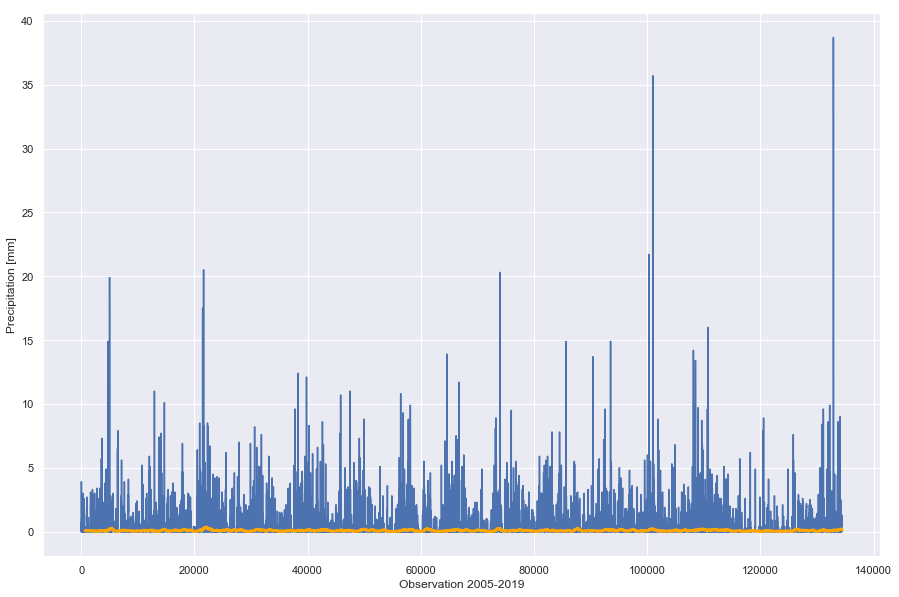

In [254]:
plt.figure(figsize=(15,10))

rolling_mean = df2.R1.rolling(window=730).mean()    
#df2 = df2.set_index('MESS_DATUM')
plt.xlabel('Observation 2005-2019')
plt.ylabel('Precipitation [mm]');
plt.plot(df2.R1)

plt.plot(rolling_mean, label='Monthly rolling mean of temperature 2005-2019', color='orange', linewidth=3)

plt.show()

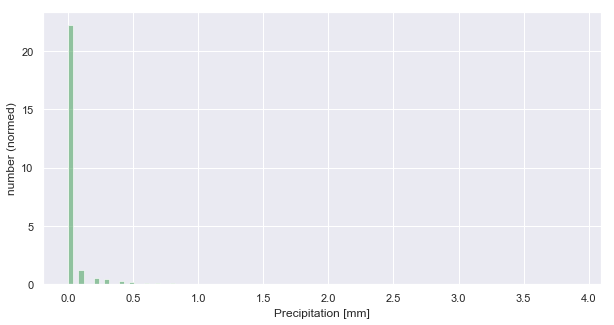

In [262]:
plt.figure(figsize=(10,5))
plt.hist(df2.R1[0:2000], bins=100, alpha=0.6, density=True, color='g');

## POISSON distribution

plt.xlabel('Precipitation [mm]')
plt.ylabel('number (normed)')
plt.ticklabel_format(style='plain', axis='y', scilimits=(0,0))
plt.ticklabel_format(style='plain', axis='x', scilimits=(0,0))

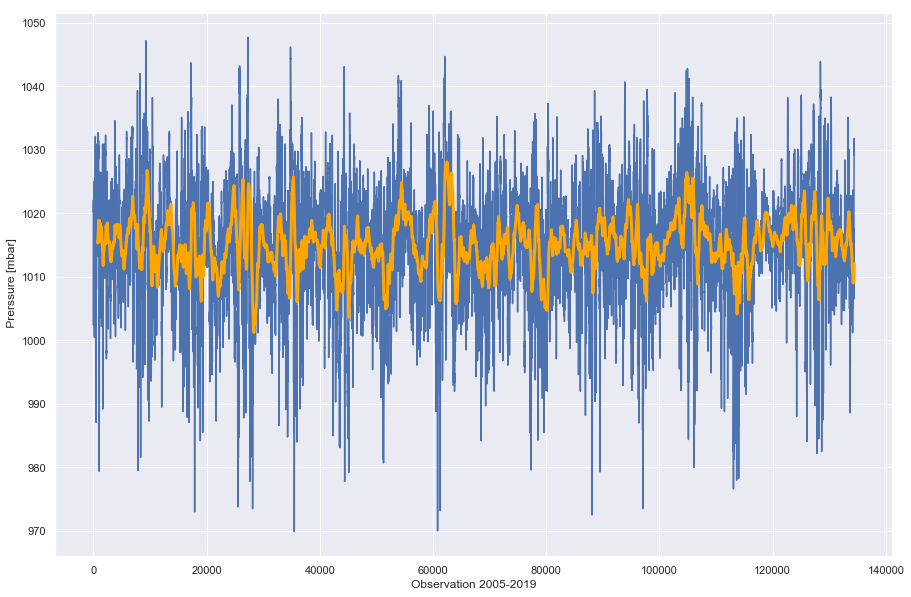

In [263]:
plt.figure(figsize=(15,10))

rolling_mean = df2.P.rolling(window=730).mean()    
#df2 = df2.set_index('MESS_DATUM')
plt.xlabel('Observation 2005-2019')
plt.ylabel(' Prerssure [mbar]');
plt.plot(df2.P)

plt.plot(rolling_mean, label='Monthly rolling mean of temperature 2005-2019', color='orange', linewidth=3)

plt.show()

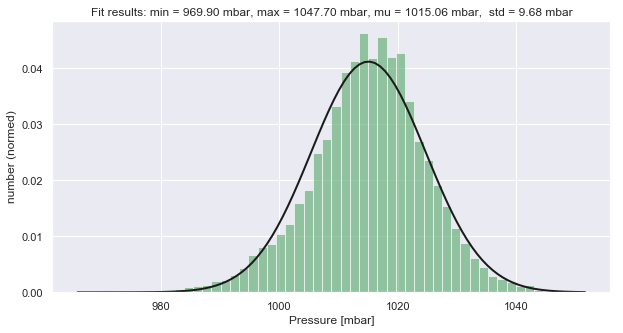

In [264]:
plt.figure(figsize=(10,5))
plt.hist(df2.P, bins=50, alpha=0.6, density=True, color='g');

mu = norm.fit(df2.P)
μ = mu[0]
σ = mu[1]
minimum = df2.P.min()
maximum = df2.P.max()
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, μ, σ)
plt.plot(x, p, 'k', linewidth=2);
title = "Fit results: min = {:.2f} mbar, max = {:.2f} mbar, mu = {:.2f} mbar,  std = {:.2f} mbar".format(minimum,maximum,μ, σ)
plt.title(title)
plt.xlabel('Pressure [mbar]')
plt.ylabel('number (normed)')
plt.ticklabel_format(style='plain', axis='y', scilimits=(0,0))
plt.ticklabel_format(style='plain', axis='x', scilimits=(0,0))

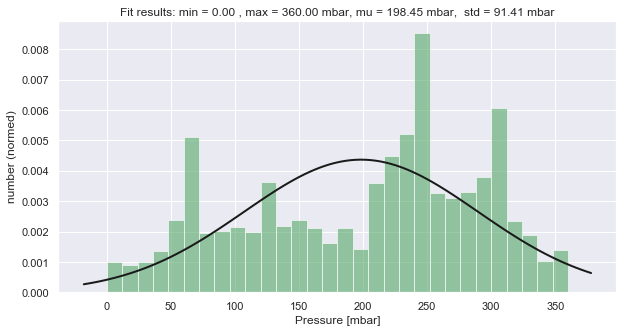

In [267]:
plt.figure(figsize=(10,5))
plt.hist(df2.DD, bins=30, alpha=0.6, density=True, color='g');

mu = norm.fit(df2.DD)
μ = mu[0]
σ = mu[1]
minimum = df2.DD.min()
maximum = df2.DD.max()
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, μ, σ)
plt.plot(x, p, 'k', linewidth=2);
title = "Fit results: min = {:.2f} , max = {:.2f} mbar, mu = {:.2f} mbar,  std = {:.2f} mbar".format(minimum,maximum,μ, σ)
plt.title(title)
plt.xlabel('Pressure [mbar]')
plt.ylabel('number (normed)')
plt.ticklabel_format(style='plain', axis='y', scilimits=(0,0))
plt.ticklabel_format(style='plain', axis='x', scilimits=(0,0))

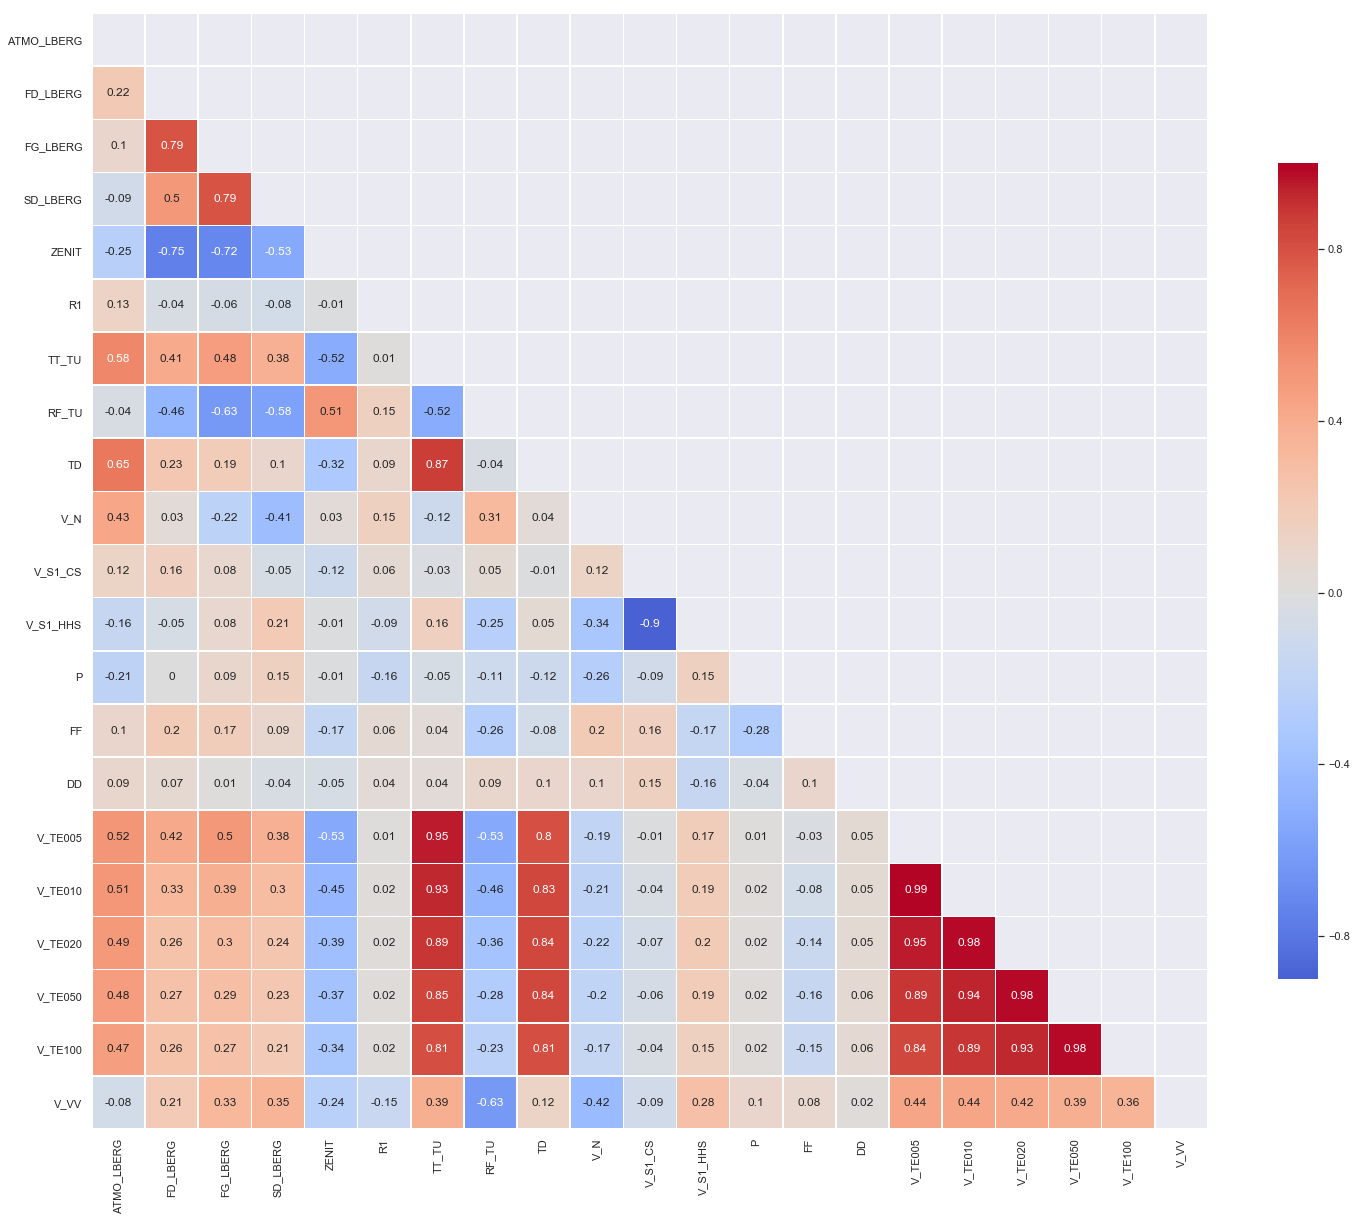

In [268]:
## Correlation matrix

corr = df2.corr()
corr = corr.round(2)
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(25,30))

sns.heatmap(corr, mask=mask, cmap='coolwarm', vmax=1, center=0, square=True, linewidths=.5, 
            annot=True, cbar_kws={"shrink": .5});

In [270]:
df2.head()

,MESS_DATUM,ATMO_LBERG,FD_LBERG,FG_LBERG,SD_LBERG,ZENIT,R1,TT_TU,RF_TU,TD,V_N,V_S1_CS,V_S1_HHS,P,FF,DD,V_TE005,V_TE010,V_TE020,V_TE050,V_TE100,V_VV
0,2005-01-01 00:01:00,120.0,0.0,0.0,0.0,148.86,0.0,4.7,95.0,4.0,7.0,7.0,90.0,1020.2,2.2,350.0,5.6,5.5,5.2,4.6,5.2,2000.0
1,2005-01-01 01:01:00,100.0,0.0,0.0,0.0,144.98,0.1,4.3,95.0,3.6,7.0,7.0,90.0,1020.5,1.5,310.0,5.3,5.4,5.2,4.6,5.1,3500.0
2,2005-01-01 02:01:00,89.0,0.0,0.0,0.0,138.39,0.0,3.1,96.0,2.5,2.0,7.0,30.0,1021.3,1.5,280.0,4.7,5.1,5.1,4.6,5.1,800.0
3,2005-01-01 06:01:00,113.0,0.0,0.0,0.0,104.08,0.0,2.0,98.0,1.7,8.0,7.0,60.0,1022.0,2.3,220.0,3.7,4.2,4.7,4.8,5.2,3500.0
4,2005-01-01 07:01:00,114.0,0.0,0.0,0.0,96.06,0.0,2.7,100.0,2.7,7.0,7.0,60.0,1021.8,2.8,210.0,3.6,4.0,4.5,4.7,5.2,4500.0


//anaconda3/envs/nf/lib/python3.6/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
//anaconda3/envs/nf/lib/python3.6/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


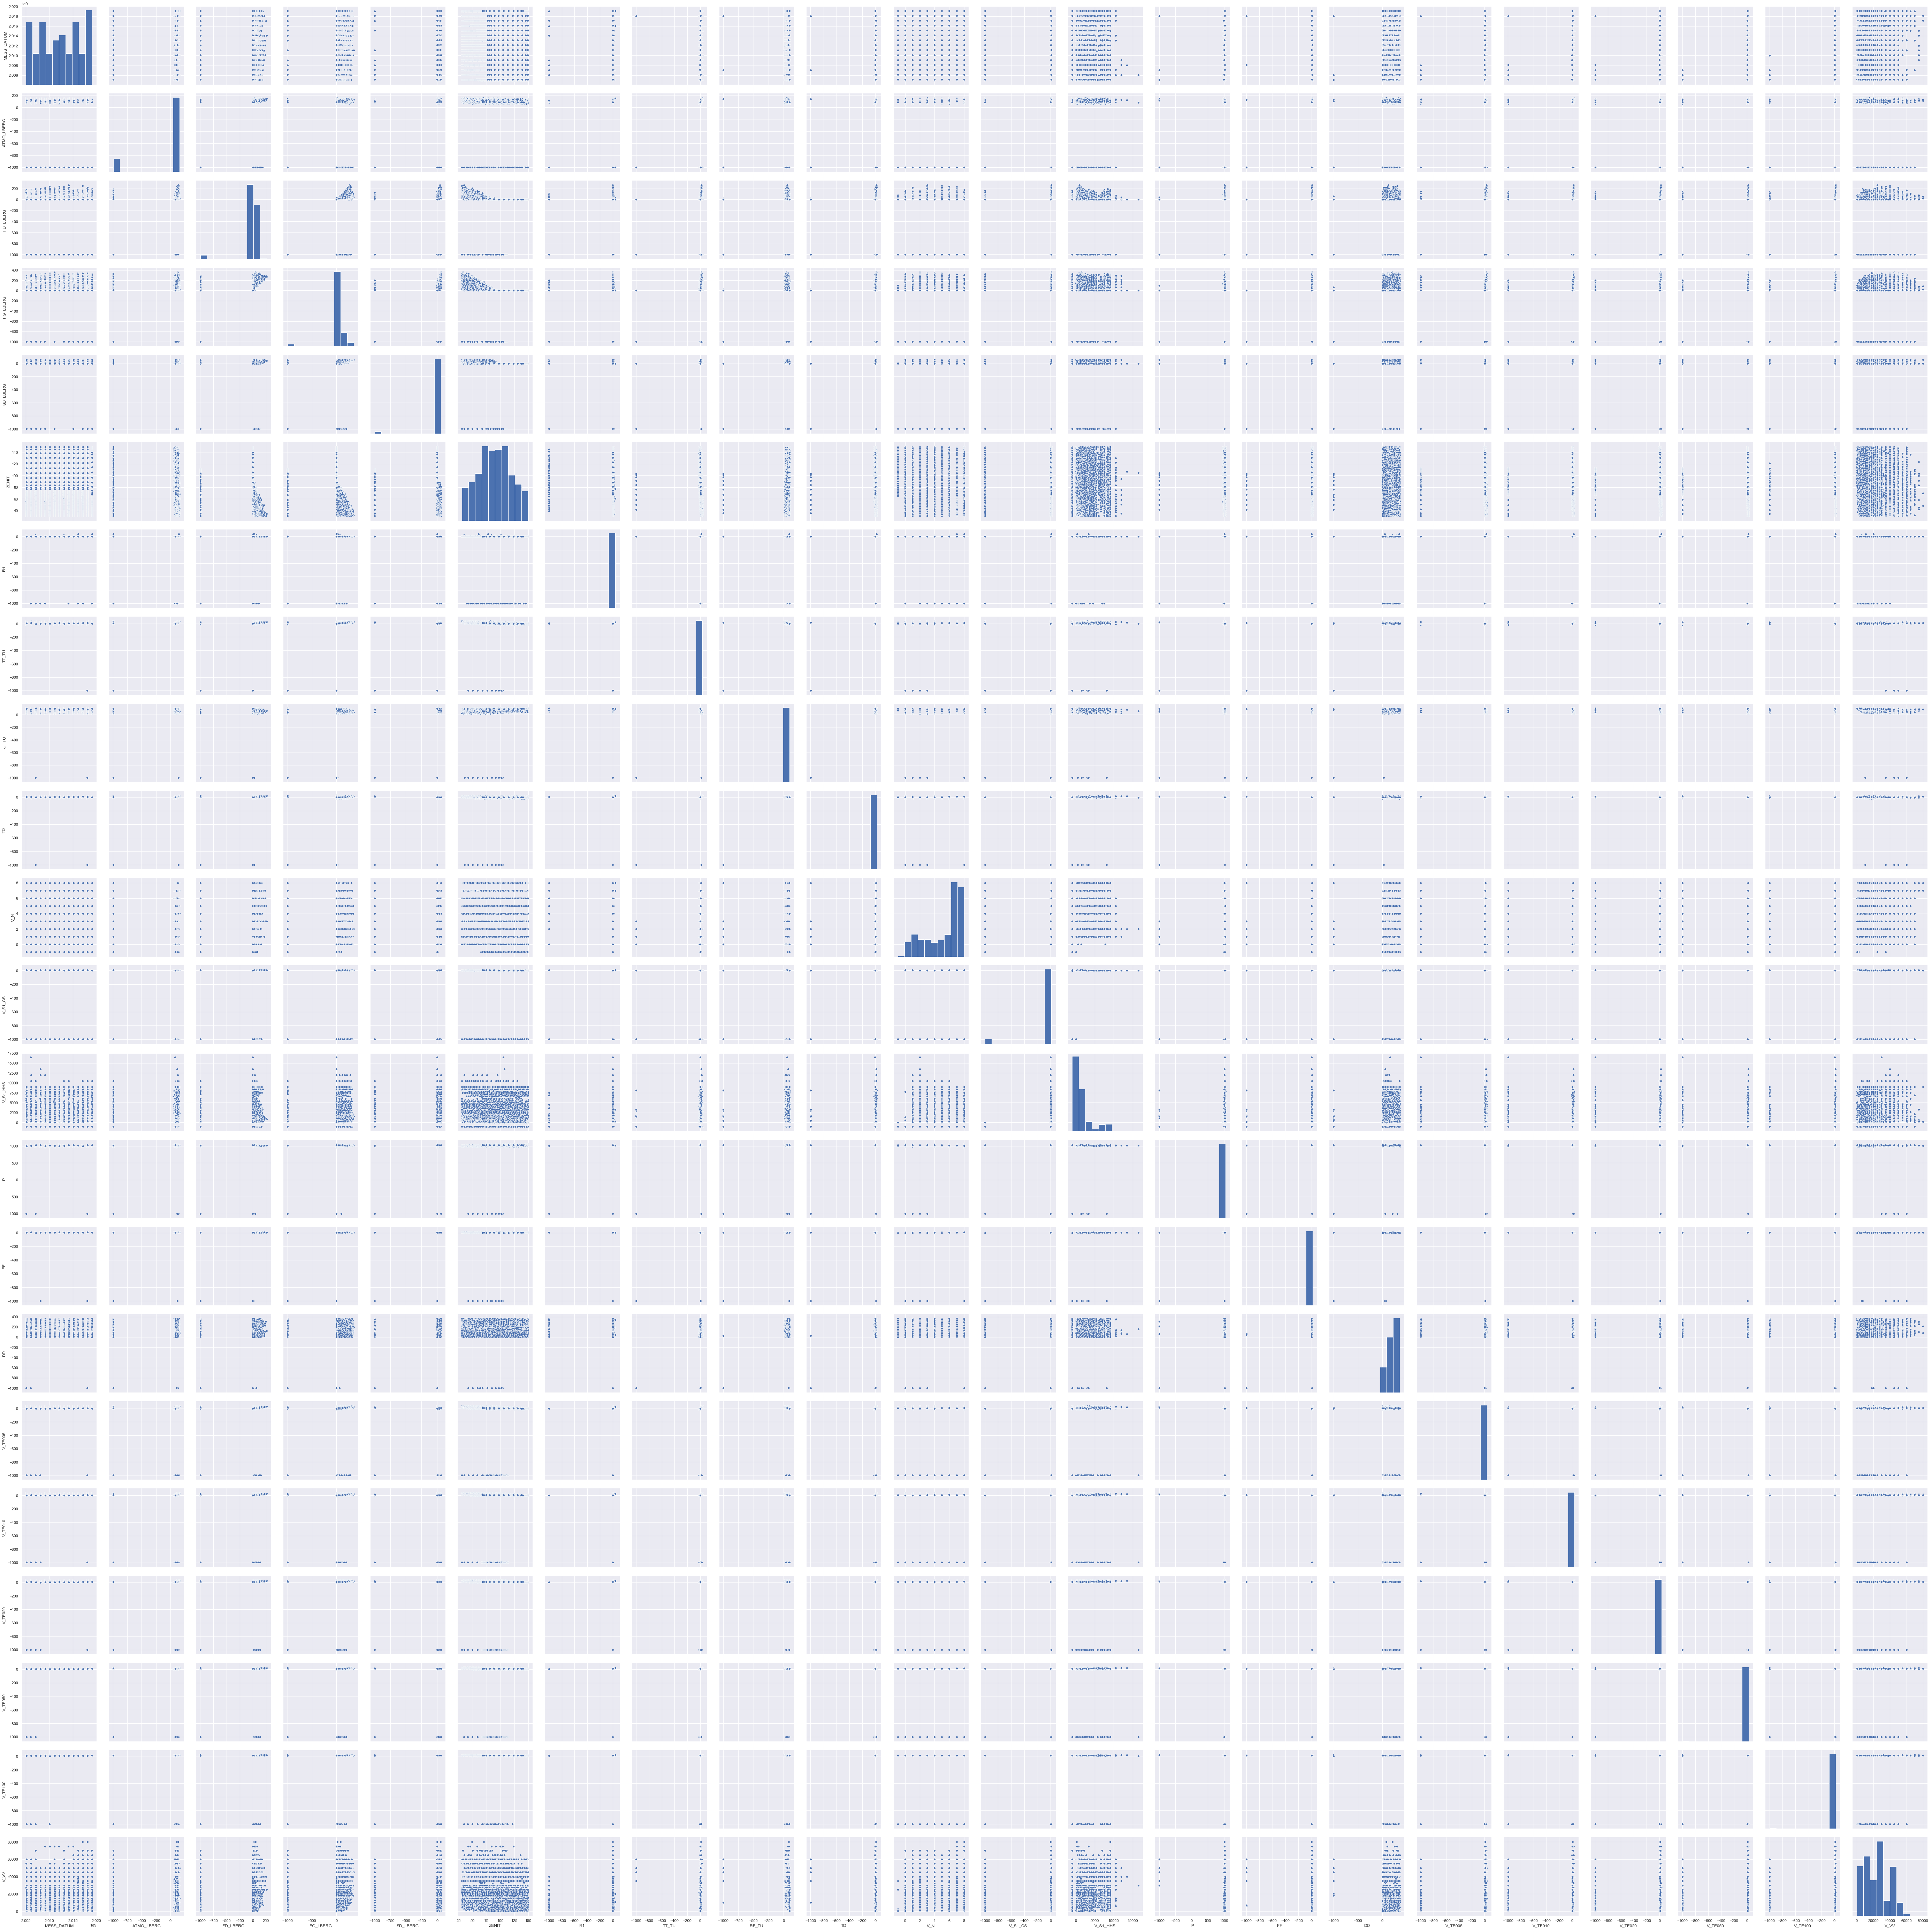

In [269]:
cols = df2.columns
sns.pairplot(df[cols], height = 3.5);

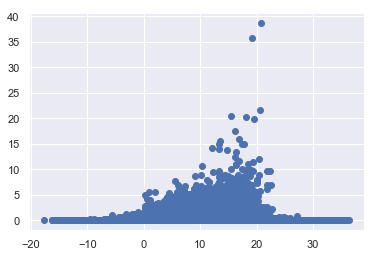

In [279]:
plt.scatter(df2.TT_TU,df2.R1)

In [280]:
df2.to_csv(r'weather_data_cleaned.csv')

## Predictive Modelling

In [274]:
cols

Index(['MESS_DATUM', 'ATMO_LBERG', 'FD_LBERG', 'FG_LBERG', 'SD_LBERG', 'ZENIT',
       'R1', 'TT_TU', 'RF_TU', 'TD', 'V_N', 'V_S1_CS', 'V_S1_HHS', 'P', 'FF',
       'DD', 'V_TE005', 'V_TE010', 'V_TE020', 'V_TE050', 'V_TE100', 'V_VV'],
      dtype='object')

### Linear Regression

In [275]:
## Linear Regression with all variables to look on the significance

model = 'TT_TU ~ ATMO_LBERG + FD_LBERG + FG_LBERG + SD_LBERG + ZENIT + R1 + TT_TU + RF_TU + TD + V_N + V_S1_CS + V_S1_HHS + P + FF + DD + V_TE005 + V_TE010 + V_TE020 + V_TE050 + V_TE100 + V_VV'
smf.ols(formula=model, data=df2).fit().summary()




<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  TT_TU   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.484e+31
Date:                Thu, 12 Dec 2019   Prob (F-statistic):               0.00
Time:                        19:33:17   Log-Likelihood:             3.8327e+06
No. Observations:              134437   AIC:                        -7.665e+06
Df Residuals:                  134415   BIC:                        -7.665e+06
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.208e-13   3.48e-14      3.470      0.001    5.26e-14    1.89e-13
ATMO_LBERG -1.499e-15   2.85e-17    -52.518      0.000   -1.55e-15   -1.44e-15
FD_LBERG   -1.121e-15   1.82e-17    -61.703      0.000   -1.16e-15   -1.09e-15
FG_LBERG    3.469e-17   1.32e-17      2.621      0.009    8.75e-18    6.06e-17
SD_LBERG   -2.152e-15   2.61e-17    -82.315      0.000    -2.2e-15    -2.1e-15
ZENIT      -6.939e-18    1.7e-17     -0.409      0.683   -4.02e-17    2.63e-17
R1         -6.939e-15   6.01e-16    -11.539      0.000   -8.12e-15   -5.76e-15
TT_TU          1.0000      5e-16      2e+15      0.000       1.000       1.000
RF_TU       1.582e-15    1.1e-16     14.378      0.000    1.37e-15     1.8e-15
TD         -6.661e-16   4.85e-16     -1.374      0.170   -1.62e-15    2.84e-16
V_N         9.437e-16   1.65e-16      5.712      0.000     6.2e-16    1.27e-15
V_S1_CS    -9.159e-16   3.19e-16     -2.872      0.004   -1.54e-15   -2.91e-16
V_S1_HHS    2.223e-17   3.73e-19     59.642      0.000    2.15e-17     2.3e-17
P          -8.327e-17   3.13e-17     -2.656      0.008   -1.45e-16   -2.18e-17
FF         -8.327e-16   1.56e-16     -5.332      0.000   -1.14e-15   -5.27e-16
DD          2.971e-17   3.14e-18      9.475      0.000    2.36e-17    3.59e-17
V_TE005     4.219e-15   9.78e-16      4.316      0.000     2.3e-15    6.13e-15
V_TE010     -7.55e-15   2.15e-15     -3.515      0.000   -1.18e-14   -3.34e-15
V_TE020      7.55e-15   2.02e-15      3.742      0.000    3.59e-15    1.15e-14
V_TE050    -5.107e-15   1.22e-15     -4.200      0.000   -7.49e-15   -2.72e-15
V_TE100     2.442e-15   5.11e-16      4.776      0.000    1.44e-15    3.44e-15
V_VV        1.775e-18   2.99e-20     59.345      0.000    1.72e-18    1.83e-18
==============================================================================
Omnibus:                     1170.510   Durbin-Watson:                   0.235
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1862.374
Skew:                          -0.049   Prob(JB):                         0.00
Kurtosis:                       3.568   Cond. No.                     3.50e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.5e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
## Linear regression with besat correlated and most significant variables
